In [157]:
# Import libraries to use for this task

import warnings
warnings.filterwarnings('ignore')

# These libraries are used during the exploratory stage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# These we will use during modelling in machine learning
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import norm, randint

## Pricing analytics forms an essential part of business strategy. In the automotive sector, it provides an effective strategy to both companies and individuals, with the assessment of the market price of a vehicle before putting it on sale or buying it.

## There are two main goals to achieve with this Data Science Project:
### 1) To get a better understanding of features that drive the purchase price of a vehicle.
### 2) To estimate the price of cars by taking into account a set of features, based on historical data. 

# Note to Mr. Logan Govender
### For the purpose of demostrating a data science application in retail space, I'm performing very minimal data cleaning, preparation and exploratory analysis. Also in the modelling section with machine learning, I will conduct a very basic hyperparameter tuning of the model since the purpose is simply to demostrate the use of machine learning to predict a target variable based solely on features describing the data.

## Introduction

##### Suppose a newly established South African car company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to offer insight on the factors affecting the pricing of cars in the American market, since those may be very different from the South African market. The company wants to know:

##### - Which variables are significant in predicting the price of a car
##### - How well those variables describe the price of a car

##### Business Goal
##### You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Data and Analysis

In [49]:
# Load and show data

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 
        'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
        'height', 'curb-weight', 'engine-type', 'num-cylinders', 'engine-size', 'fuel-system',
        'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

data = pd.read_csv('car_price.csv', names=cols)
print('Our data consists of {} rows and {} columns!\n\n'.format(data.shape[0],data.shape[1]))
data.head()

Our data consists of 205 rows and 26 columns!




,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [128]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


#### Browsing through we see there are missing fields marked with a '?' symbol. The data summary via the describe() method omits columns with this invalid data type. These will be substituted with NAN value, and the NAN will be filled with average value of a column

In [22]:
data = data.replace('?', np.nan)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [28]:
# Check how many nans are there per column

data.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-cylinders         0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [33]:
# Make a copy and do simple substitution

df = data.copy()
norm_loss_avg = df['normalized-losses'].astype('float').mean()
df['normalized-losses'].replace(np.NaN, norm_loss_avg, inplace=True)

bore_avg = df['bore'].astype('float').mean()
df['bore'].replace(np.NaN, bore_avg, inplace=True)


rpm_avg = df['peak-rpm'].astype('float').mean()
df['peak-rpm'].replace(np.NaN, rpm_avg, inplace=True)

# Drop rows of nan horsepower, num-of-doors, stroke, and price entries
df.dropna(subset = ['horsepower','num-of-doors','stroke','price'], axis=0, inplace=True)

# Check the types so that we can make correction
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-cylinders         object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [35]:
# Convert to proper data types where necessary

df[['bore','stroke','peak-rpm','price']] = df[['bore','stroke','peak-rpm','price']].astype('float')
df[['normalized-losses','horsepower']] = df[['normalized-losses','horsepower']].astype('int')
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-cylinders         object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Investigate association between numerical variables

#### We look at Pearson correlation:
#### Independent variables: Compression-ratio, horsepower, engine-size
#### Dependent variable: Price

In [111]:
shapiro_test = stats.shapiro(df['price'])
print('Price:> shapiro test statistics is {:.2e} and shapiro pvalue is {:.2e}'.format(shapiro_test[0],shapiro_test[1]))

shapiro_test = stats.shapiro(df['horsepower'])
print('\nHorsepower:> shapiro test statistics is {:.2e} and shapiro pvalue is {:.2e}'.format(shapiro_test[0],shapiro_test[1]))

shapiro_test = stats.shapiro(df['engine-size'])
print('\nEngine size:> shapiro test statistics is {:.2e} and shapiro pvalue is {:.2e}'.format(shapiro_test[0],shapiro_test[1]))

Price:> shapiro test statistics is 8.01e-01 and shapiro pvalue is 6.11e-15

Horsepower:> shapiro test statistics is 9.02e-01 and shapiro pvalue is 5.76e-10

Engine size:> shapiro test statistics is 8.13e-01 and shapiro pvalue is 1.74e-14


### Shapiro test is used to test if whether a particular random variable is drawn from a normal distribution
##### In this case, since the pvalues are less than 0.05, this means we reject the null hypothesis that the variables:  price, engine-size and horsepower are drawn from normal distribution.

##### Below we calculate correlation between the independent variables (i.e. compression-ratio, engine-size and horsepower) and dependent variable (price). This test is used as one of the ways to filter out features which strongly vary in a similar sense with the dependent variable. Features which seem strongly coupled to the depedent variable are assumed later when modelling with machine learning as strong predictors of the target variable.

In [115]:
selected_var = ['engine-size',
        'compression-ratio','horsepower','normalized-losses','bore','stroke',
                'peak-rpm','wheel-base', 'length', 'width',
        'height', 'curb-weight', 'num-cylinders','price']
df[selected_var].corr(method='pearson')

,engine-size,compression-ratio,horsepower,normalized-losses,bore,stroke,peak-rpm,wheel-base,length,width,height,curb-weight,price
engine-size,1.000000,0.025257,0.845325,0.142821,0.581854,0.214518,-0.217769,0.568375,0.686998,0.739903,0.026906,0.857188,0.888778
compression-ratio,0.025257,1.000000,-0.203818,-0.112980,-0.004172,0.199600,-0.439741,0.252234,0.156061,0.188631,0.253934,0.161030,0.074483
horsepower,0.845325,-0.203818,1.000000,0.217727,0.572972,0.102913,0.101383,0.377040,0.589650,0.621532,-0.081730,0.762154,0.812453
normalized-losses,0.142821,-0.112980,0.217727,1.000000,-0.025608,0.054589,0.213594,-0.043395,0.033177,0.093666,-0.355796,0.108699,0.138700
bore,0.581854,-0.004172,0.572972,-0.025608,1.000000,-0.065038,-0.273766,0.495957,0.606373,0.541633,0.182445,0.645070,0.546295
stroke,0.214518,0.199600,0.102913,0.054589,-0.065038,1.000000,-0.068420,0.174225,0.121888,0.188733,-0.054338,0.175349,0.096007
peak-rpm,-0.217769,-0.439741,0.101383,0.213594,-0.273766,-0.068420,1.000000,-0.350823,-0.276144,-0.247612,-0.257334,-0.278528,-0.103835
wheel-base,0.568375,0.252234,0.377040,-0.043395,0.495957,0.174225,-0.350823,1.000000,0.879307,0.818465,0.591239,0.782173,0.584951
length,0.686998,0.156061,0.589650,0.033177,0.606373,0.121888,-0.276144,0.879307,1.000000,0.857368,0.491050,0.882694,0.695928
width,0.739903,0.188631,0.621532,0.093666,0.541633,0.188733,-0.247612,0.818465,0.857368,1.000000,0.310640,0.867640,0.754649


### Correlation between independent and dependent variables in the order:
#### strong >> weak
#### engine-size > curb-weight > horsepower > width > wheel-base > bore > length > ...
#### Because these correlations are positive, this means the price increase as engine-size increases. 
#### Because engine-size is postive, strongly correlated to horsepower, from engineering view this means a bigger engine is required in order to achieve lot of horsepower. In turn compression-ratio decreases with increasing horserpower.

### This is illustrated in the figures below:
#### Data points are shown as scatter plot and estimation of linear regression between independent and dependent variables by a straight line
#### Engine-size and horsepower seems like a good predictor of price
#### Compression-ratio not a good predictor because of weak to no discenable linear association with price. This means when we build ML algorithm to predict purchase price, compression-ratio can be dropped during dimensionality-reduction.

(0, 47436.278368304556)

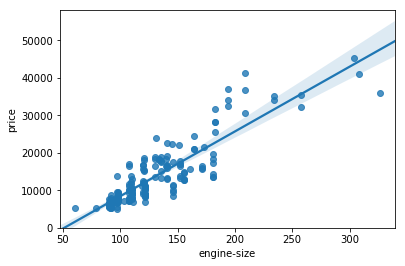

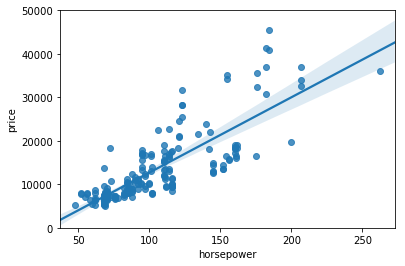

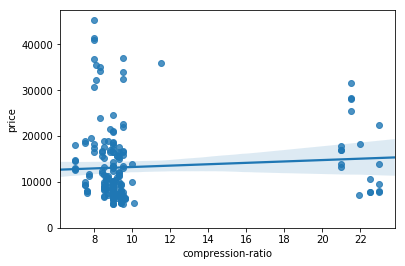

In [37]:
plt.figure(1)
sns.regplot(x='engine-size',y='price', data = df)
plt.ylim(0,)

plt.figure(2)
sns.regplot(x='horsepower',y='price', data=df)
plt.ylim(0,)

plt.figure(3)
sns.regplot(x='compression-ratio',y='price', data=df)
plt.ylim(0,)

In [48]:
# Interpretation of p-value:
# p-value < 0.001: strong evidence that correlation is significant
# p-value < 0.05: moderate evidence that correlation is significant
# p-value < 0.1: weak evidence that correlation is significant
# p-value > 0.1: no evidence that correlation is significant
#-------------------------------------------------------------------------------

pearson_coef, p_value = stats.pearsonr(df['engine-size'],df['price'])
print('Correlation between engine-size and price')
print('Pearson coeff is {}'.format(pearson_coef))
print('p-value is {}'.format(p_value))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')

pearson_coef, p_value = stats.pearsonr(df['wheel-base'],df['price'])
print('Correlation between wheel-base and price')
print('Pearson coeff is {}'.format(pearson_coef))
print('p-value is {}'.format(p_value))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')

pearson_coef, p_value = stats.pearsonr(df['length'],df['price'])
print('Correlation between length and price')
print('Pearson coeff is {}'.format(pearson_coef))
print('p-value is {}'.format(p_value))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')

pearson_coef, p_value = stats.pearsonr(df['width'],df['price'])
print('Correlation between width and price')
print('Pearson coeff is {}'.format(pearson_coef))
print('p-value is {}'.format(p_value))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')

pearson_coef, p_value = stats.pearsonr(df['curb-weight'],df['price'])
print('Correlation between curb-weight and price')
print('Pearson coeff is {}'.format(pearson_coef))
print('p-value is {}'.format(p_value))

Correlation between engine-size and price
Pearson coeff is 0.888778495311
p-value is 1.25250791781e-66
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Correlation between wheel-base and price
Pearson coeff is 0.584950622306
p-value is 4.1642978157e-19
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Correlation between length and price
Pearson coeff is 0.695927914444
p-value is 2.8092662991e-29
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Correlation between width and price
Pearson coeff is 0.754648894838
p-value is 8.44009950371e-37
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Correlation between curb-weight and price
Pearson coeff is 0.835367753626
p-value is 1.58758630333e-51


##### Since all p-values (calculate above) are a lot less than 0.001, this suggests strong evidence that the correlations are significant. This is an important information that informs what parameters carries weight in the determination of price. From an engineering view, this conclusion agrees well with an intuition that price of a bigger car (SUV) should be more than of a smaller car because it means more material is needed when manufacturing.

### Relationship with categorical variables

In [41]:
# Look for average prices within categories.
# We use groupby method
# From this we can look at a specific car make and get average price based on driven wheels and body style

first_group = df[['make','drive-wheels','body-style','price']]
result1 = first_group.groupby(['make','drive-wheels','body-style'], as_index=False).mean()
result1

,make,drive-wheels,body-style,price
0,alfa-romero,rwd,convertible,14997.500000
1,alfa-romero,rwd,hatchback,16500.000000
2,audi,4wd,sedan,17450.000000
3,audi,fwd,sedan,17696.250000
4,audi,fwd,wagon,18920.000000
5,bmw,rwd,sedan,26118.750000
6,chevrolet,fwd,hatchback,5723.000000
7,chevrolet,fwd,sedan,6575.000000
8,dodge,fwd,hatchback,7819.800000
9,dodge,fwd,sedan,7150.500000


##### Above table show results of average price of categories made out of groups by make, driven wheels and body style. For a particular make it appears sedans, followed by wagons, are generally more pricey than the hatchbacks. Also rear-wheel drive (rwd) cars appear more expensive than front-wheel drive (fwd). This is interesting because for rwd, the design is more complicated and features more sofisticated parts (driveshaft) than fwd. However, 4wd cars seems more expensive than the rwd. This is also due to an increase in complexity when designing and manufacturing, and also an increase in the number of parts. 

In [122]:
# If we were to focus our analysis selected few brands
selected_brands = ['audi','bmw','mercedes-benz','volkswagen']

df1 = df[df.make.str.contains('|'.join(selected_brands))]
third_group = df1[['body-style','horsepower','make','aspiration','engine-size','fuel-type','engine-type','city-mpg', 'highway-mpg','price']]
result3 = third_group.groupby(['make','aspiration','engine-size','body-style','fuel-type','engine-type','horsepower','city-mpg', 'highway-mpg'], as_index=False).mean()
result3

,make,aspiration,engine-size,body-style,fuel-type,engine-type,horsepower,city-mpg,highway-mpg,price
0,audi,std,109,sedan,gas,ohc,102,24,30,13950.000000
1,audi,std,136,sedan,gas,ohc,110,19,25,16480.000000
2,audi,std,136,sedan,gas,ohc,115,18,22,17450.000000
3,audi,std,136,wagon,gas,ohc,110,19,25,18920.000000
4,audi,turbo,131,sedan,gas,ohc,140,17,20,23875.000000
5,bmw,std,108,sedan,gas,ohc,101,23,29,16677.500000
6,bmw,std,164,sedan,gas,ohc,121,20,25,24565.000000
7,bmw,std,164,sedan,gas,ohc,121,21,28,21037.500000
8,bmw,std,209,sedan,gas,ohc,182,15,20,36880.000000
9,bmw,std,209,sedan,gas,ohc,182,16,22,36037.500000


##### From table above, which shows average price grouped by whether the car is naturally aspirated or is turbo-charged. For same engine-size, turbo-charged cars are more expensive than naturally aspirated. This is due to expensive turbo and extra parts associated with it. Also turbo-charged cars usually features smaller engine-size in comparison to naturally aspirated, however for same body-style and engine-size, turbo-charged cars produce more horsepower. Fuel consumption figures are very similar for same body-style and engine-size. However, for same body-style, naturally aspirated seem to have more horsepower figures and terrible fuel consumption than the turbo-charged cars.

#### This means for same body-style, considering the fuel price, a consumer can over a long period save with a turbo-charged option for as long as the turbo-charger does not break.

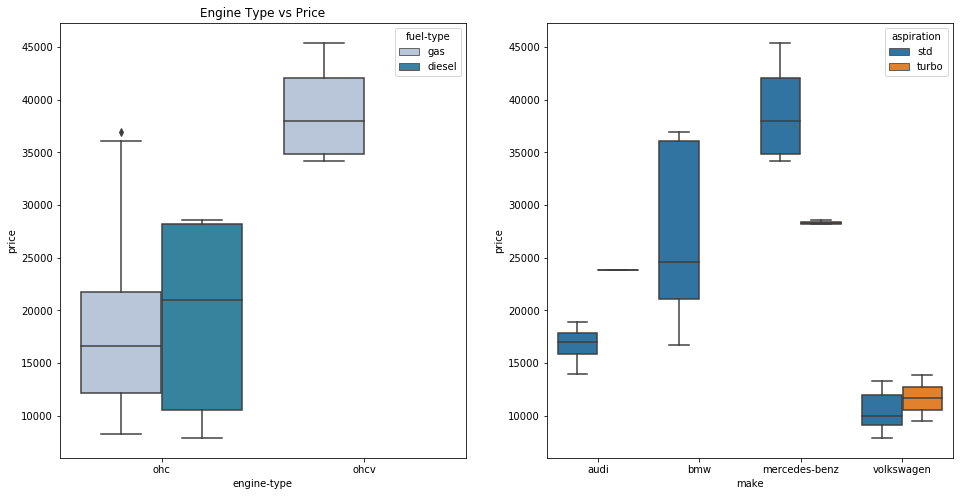

In [124]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('Engine Type vs Price')
sns.boxplot(data = result3,
            x='engine-type',
            y='price',
            hue='fuel-type',
            palette=("PuBuGn"))

plt.subplot(1,2,2)
chart = sns.boxplot(data=result3,
        x="make",
        y='price',
        hue='aspiration')
ch_labels = chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

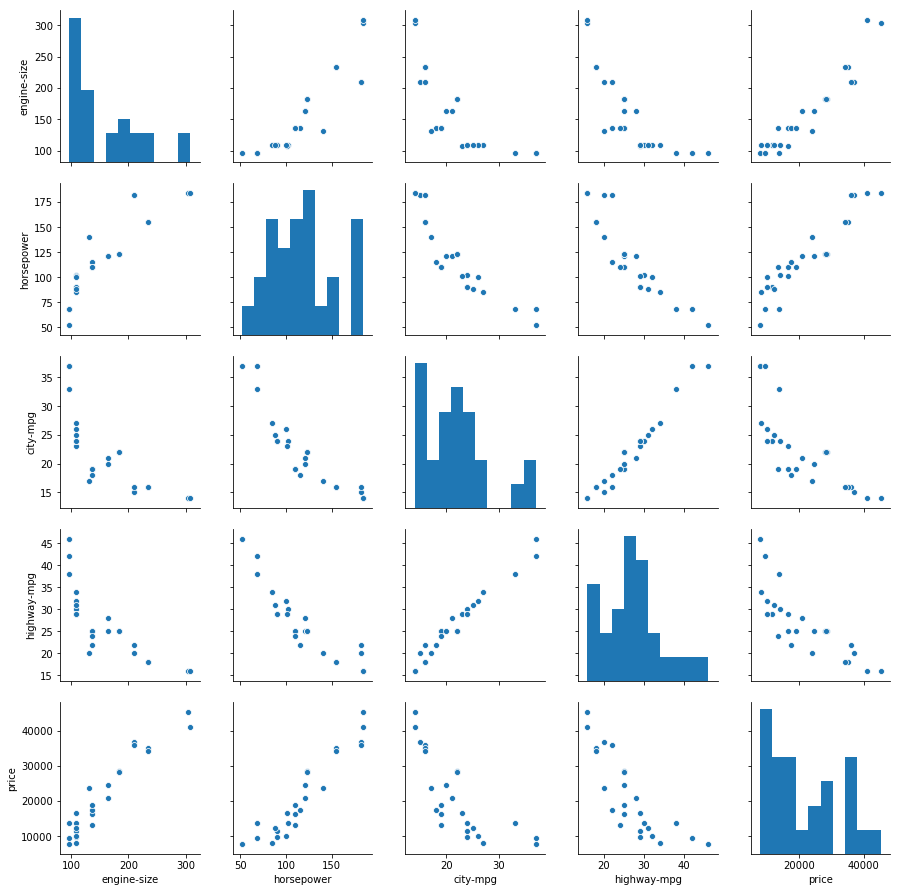

In [149]:
sns.pairplot(result3)

## Model price with machine learning

In [129]:
# Suppose we don't want to consider the following features in our modelling
drop_cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 
        'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 
        'engine-type', 'fuel-system', 'num-cylinders','compression-ratio',
        'peak-rpm', 'height']

df = df.drop(drop_cols, axis=1)

# Change data type

df['curb-weight'] = df['curb-weight'].astype(float)
df['engine-size'] = df['engine-size'].astype(float)
df['horsepower'] = df['horsepower'].astype(float)
df['city-mpg'] = df['city-mpg'].astype(float)
df['highway-mpg'] = df['highway-mpg'].astype(float)

# Set independent variable X and dependent variable y
X = df.drop(['price'],axis=1)
y = df['price']
print(X.dtypes)

wheel-base     float64
length         float64
width          float64
curb-weight    float64
engine-size    float64
bore           float64
stroke         float64
horsepower     float64
city-mpg       float64
highway-mpg    float64
dtype: object


In [131]:
# Reserve 20 percent of our data for model evaluation purpose
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=0)

In [132]:
# Since the units of different features (X) are not the same, we will first scale them 

sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [150]:
# We will experiment with 2 models at the moment!

# Define Random Forest Regression model:

def RFR(train_X,train_y,test_X):
    param_distributions = {'n_estimators': randint(1,5),
            'max_depth': randint(5,10)}
    rfrregressor = RandomizedSearchCV(estimator = RandomForestRegressor(random_state=0),
            n_iter=5,
            param_distributions = param_distributions,
            random_state=0)
    rfrfit = rfrregressor.fit(train_X, train_y)
    y_pred = rfrfit.predict(test_X)
    model_score = rfrfit.score(test_X,test_y)

    return y_pred, model_score, rfrregressor.best_params_

# Define Gradient Boosting Regression model:

def GBR(train_X,train_y,test_X):
    param_distributions = {'n_estimators':[10,100,500,1000],
            'max_depth':[2,3,5,10,15],
            'learning_rate':[0.1,0.01,0.001]}
    gbrregressor = RandomizedSearchCV(estimator = GradientBoostingRegressor(random_state=0),
            param_distributions=param_distributions,
            random_state=0)
    gbrfit = gbrregressor.fit(train_X, train_y)
    y_pred = gbrfit.predict(test_X)
    model_score = gbrfit.score(test_X,test_y)

    return y_pred, model_score, gbrregressor.best_params_

In [151]:
# Feed data to our models
RFR_y_predicted, RFR_model_score, RFR_params = RFR(train_X,train_y,test_X)
GBR_y_predicted,GBR_model_score, GBR_params = GBR(train_X,train_y,test_X)

In [152]:
print('Random Forest Regressor results')
pred = pd.DataFrame.from_dict({'predicted':RFR_y_predicted, 'true':test_y})
pred['difference'] = pred.predicted - pred.true
pred['ratio'] = 1.0 - (pred.true/pred.predicted)
print(pred.sample(n=10).round(2))

Random Forest Regressor results
     predicted     true  difference  ratio
190    9688.90   9980.0     -291.10  -0.03
138    7280.46   5118.0     2162.46   0.30
19     5486.49   6295.0     -808.51  -0.15
151    7481.22   6338.0     1143.22   0.15
80     9251.71   9959.0     -707.29  -0.08
135   13658.83  15510.0    -1851.17  -0.14
122    7529.24   7609.0      -79.76  -0.01
115   14545.92  16630.0    -2084.08  -0.14
120    6535.02   6229.0      306.02   0.05
105   16156.06  19699.0    -3542.94  -0.22


In [153]:
print('GradientBoost Regressor results')
pred = pd.DataFrame.from_dict({'predicted':GBR_y_predicted, 'true':test_y})
pred['difference'] = pred.predicted - pred.true
pred['ratio'] = 1.0 - (pred.true/pred.predicted)
print(pred.sample(n=10).round(2))

GradientBoost Regressor results
     predicted     true  difference  ratio
19     6602.37   6295.0      307.37   0.05
171   14066.05  11549.0     2517.05   0.18
28    10511.10   8921.0     1590.10   0.15
176   10860.65  10898.0      -37.35  -0.00
23     8912.57   7957.0      955.57   0.11
191   14284.20  13295.0      989.20   0.07
35     7353.21   7295.0       58.21   0.01
153    7661.24   6918.0      743.24   0.10
120    6703.86   6229.0      474.86   0.07
166   10299.68   9538.0      761.68   0.07


In [160]:
# Evaluate the model

mae = metrics.mean_absolute_error(test_y,RFR_y_predicted)
mse = metrics.mean_squared_error(test_y,RFR_y_predicted)
rmse = np.sqrt(metrics.mean_squared_error(test_y,RFR_y_predicted))
RFR_r2 = r2_score(test_y, GBR_y_predicted)

print('Evaluate Random Forest:')
print('Mean Absolute Error is {}'.format(mae))
print('Mean Squared Error is {}'.format(mse))
print('Root Mean Squared Error is {}'.format(rmse))
print('Accuracy: %.2f%%' %(RFR_model_score*100))
print('R2 score: %.2f%%' %(RFR_r2*100))
print('Best parameter values are {}'.format(RFR_params))

Evaluate Random Forest:
Mean Absolute Error is 1323.99672693
Mean Squared Error is 2888930.03854
Root Mean Squared Error is 1699.68527632
Accuracy: 94.98%
R2 score: 95.64%
Best parameter values are {'n_estimators': 4, 'max_depth': 6}


In [159]:
mae = metrics.mean_absolute_error(test_y,GBR_y_predicted)
mse = metrics.mean_squared_error(test_y,GBR_y_predicted)
rmse = np.sqrt(metrics.mean_squared_error(test_y,GBR_y_predicted))
GBR_r2 = r2_score(test_y, GBR_y_predicted)

print('Evaluate GradientBoost:')
print('Mean Absolute Error is {}'.format(mae))
print('Mean Squared Error is {}'.format(mse))
print('Root Mean Squared Error is {}'.format(rmse))
print('Accuracy: %.2f%%' %(GBR_model_score*100))
print('R2 score: %.2f%%' %(GBR_r2*100))
print('Best parameter values are {}'.format(GBR_params))

Evaluate GradientBoost:
Mean Absolute Error is 1182.8362557
Mean Squared Error is 2511265.33496
Root Mean Squared Error is 1584.69723763
Accuracy: 95.64%
R2 score: 95.64%
Best parameter values are {'n_estimators': 500, 'learning_rate': 0.01, 'max_depth': 2}


## R-squared score of both models indicates that more than 90% variance is explained. This means that either model can be used and trusted on an unseen dataset.
## Both models also are about 95% accurate.

### There's a lot of issues I'm not covering here, e.g. the cost of wrong prediction, the effect of multicollinearity and ... But this was just for demostration purposes. 